# Simple way to detect object using YOLO V8

## Connect to Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
FOLDER_PATH = '/content/drive/MyDrive/Yolo/Detect Object'
sys.path.append(FOLDER_PATH)

## Install/import the required libraries

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [4]:
import torch
import torchvision
from ultralytics import YOLO

In [5]:
print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu121
0.18.1+cu121


## Create the model

In [6]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 75.6MB/s]


## Predict an image

In [7]:
import os
img = os.path.join(FOLDER_PATH, '/content/cat_dog.webp')
print(img)

/content/cat_dog.webp


In [8]:
results = model.predict(img)


image 1/1 /content/cat_dog.webp: 448x640 1 cat, 1 dog, 1690.5ms
Speed: 13.2ms preprocess, 1690.5ms inference, 31.2ms postprocess per image at shape (1, 3, 448, 640)


## Display the results

In [9]:
#As we provided only a single image, it returns an array with a single item
result = results[0]

In [10]:
len(result.boxes)

2

In [11]:
box = result.boxes[0]
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([15.])
Coordinates: tensor([[142.5257, 157.8812, 283.5551, 289.4049]])
Probability: tensor([0.9427])


In [12]:
print("Object type:",box.cls[0])
print("Coordinates:",box.xyxy[0])
print("Probability:",box.conf[0])

Object type: tensor(15.)
Coordinates: tensor([142.5257, 157.8812, 283.5551, 289.4049])
Probability: tensor(0.9427)


In [13]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 15.0
Coordinates: [142.52574157714844, 157.8811798095703, 283.5550842285156, 289.4049072265625]
Probability: 0.9426767826080322


In [14]:
print(result.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [15]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: cat
Coordinates: [143, 158, 284, 289]
Probability: 0.94


In [16]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: cat
Coordinates: [143, 158, 284, 289]
Probability: 0.94
---
Object type: dog
Coordinates: [268, 85, 396, 282]
Probability: 0.94
---


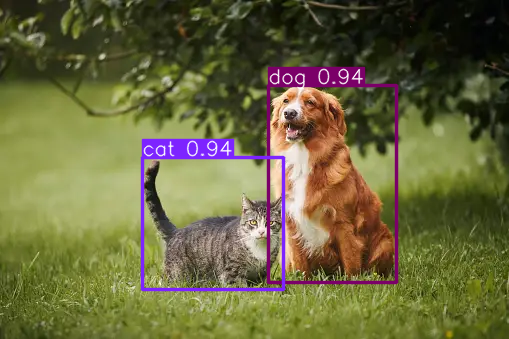

In [17]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])